# **Lab Exercise: Linear and Logistic Regression**

## **Linear Regression Construction** 

#### **Section 1: Setting Up and Importing Libraries**
*Objective:* Load the required `Python libraries`.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Section 2: Linear Regression Data Preparation**

*Objective:* Create a dataset for linear regression.

Task: Write the code to:

Create a dataset with features and target variables for linear regression.
Visualize the data using Matplotlib.


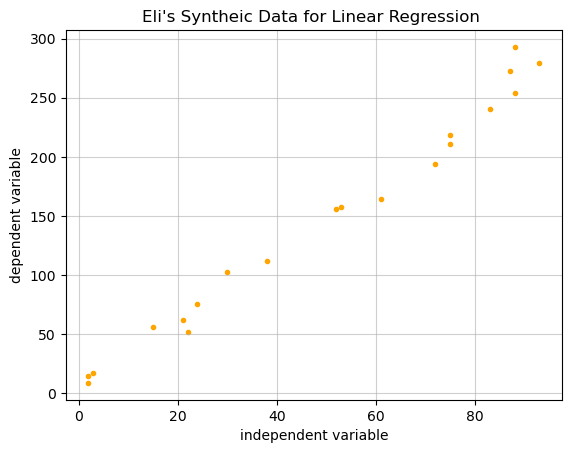

In [4]:
# Generate synthetic data for linear regression
np.random.seed(42)  # For reproducibility
X = np.random.randint(1, 100, 20)  # Features (independent variable)
y = 3 * X + 7 + np.random.normal(0, 15, 20)  # Target with noise

# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid

# Your code

%matplotlib inline
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.scatter(X,y,color='orange',marker='.')
plt.title('Eli\'s Syntheic Data for Linear Regression ')
plt.grid(alpha=0.6)
plt.show()

#### **Section 3: Implementing Linear Regression**

*Objective:* Practice linear regression construction.

Task: Write the code to:

Write a Linear Regression function to minimize the cost function and find the optimal parameters.


For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it.

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


In [5]:
# Your code for linear regression model

# Sklearn model
from sklearn import linear_model

# Prepare data
X_train = []

for element in X:
    X_train.append([element])

y_train = y

# Building the Model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Review Model parameter 
print("Linear Equation: y =", reg.coef_[0], "* x +", reg.intercept_)



Linear Equation: y = 2.9241599679036803 * x + 3.1375660847499205


### **Section 4: Visualizing the Linear Regression Line**

*Objective:* Plot the regression line with the original data.

Task: Plot the data points and the fitted regression line.

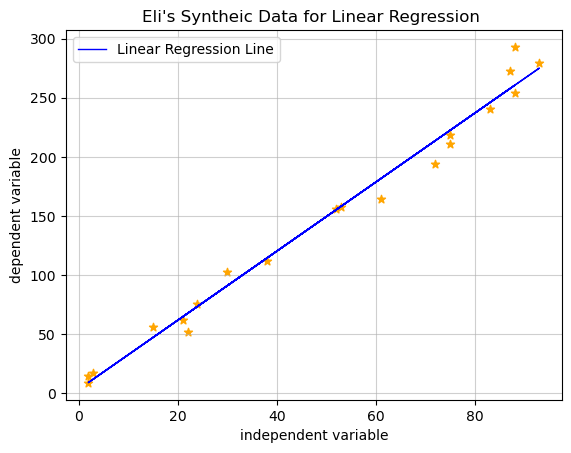

In [6]:
# Compare predictions with actual values
# y_pred = np.dot(X, theta)


# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code: 

%matplotlib inline
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.plot(X_train, reg.predict(X_train), label="Linear Regression Line", color="blue", linewidth=1)
plt.scatter(X_train, y_train, color='orange', marker='*')
plt.title('Eli\'s Syntheic Data for Linear Regression ')
plt.grid(alpha=0.6)
plt.legend()
plt.show()

plt.show()

## **Logistic Regression Construction** 

#### **Section 1: Logistic Regression Data Preparation**

*Objective:* Prepare data for logistic regression.

Task: Write the code to:

Create synthetic data for binary classification.
Visualize the data.

#### Dataset Description

Study_hour_Data.csv - The dataset simulates a scenario where students' chances of passing a course are influenced by their study habits and class participation. It contains 200 observations and the following three columns:


**Hours of Study:**
Integer values representing the number of hours a student spends studying in a week.
Range: 0 to 9.

**Class Participation:**
Float values between 0 and 1, representing the level of engagement in class activities.
Higher values indicate greater participation.

**Passed:**
Binary target variable indicating whether the student passed the course:
1: Passed.
0: Did not pass.
Determined based on a weighted combination of Hours of Study and Class Participation (with added noise), with a threshold value of 5.

In [19]:
import pandas as pd
import glob
#read data from Pandas 

# Load dataset
# please use Study_hour_Data.csv as your target data
data = pd.read_csv(glob.glob('*')[1])

# Display basic information
print(data.info())
print(data.describe())

#Generate your training data X & y
X =  data[['Hours of Study', 'Class Participation']]#use column Hours of Study
y =  data[['Passed']]#use columns Passed

print(X, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours of Study       200 non-null    int64  
 1   Class Participation  200 non-null    float64
 2   Passed               200 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.8 KB
None
       Hours of Study  Class Participation      Passed
count      200.000000           200.000000  200.000000
mean         4.115000             0.505828    0.750000
std          2.751295             0.289315    0.434099
min          0.000000             0.009934    0.000000
25%          2.000000             0.248919    0.750000
50%          4.000000             0.492630    1.000000
75%          6.000000             0.771555    1.000000
max          9.000000             0.992191    1.000000
     Hours of Study  Class Participation
0                 8             0.486891
1             

#### **Section 2: Visualize the data**

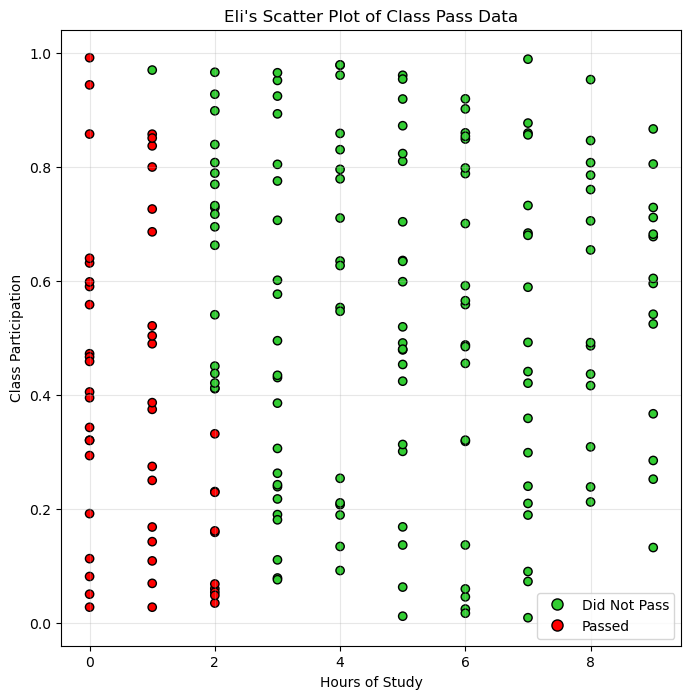

In [51]:
# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# I used chatGPT to help me make the graph look how I wanted it to

# Your code: 
y_numeric = np.array(y)  # Convert y to np array so it works with matplotlibs color mapping

# Create figure
fig = plt.figure(figsize=(8,8))

# Define custom colormap with brighter green
from matplotlib.colors import ListedColormap
colors = ['red', 'white', 'limegreen']  # 'limegreen' is a brighter green
cmap = ListedColormap(colors)

# Scatter plot
scatter = plt.scatter(X['Hours of Study'], X['Class Participation'], 
                       c=y_numeric, cmap=cmap, edgecolors='k')

# Labels
plt.xlabel('Hours of Study')
plt.ylabel('Class Participation')
plt.title("Eli's Scatter Plot of Class Pass Data")
plt.grid(alpha=0.3)

# Add legend manually
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Did Not Pass', 
           markerfacecolor='limegreen', markersize=8, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Passed', 
           markerfacecolor='red', markersize=8, markeredgecolor='k')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.show()

#### **Section 3: Implementing Logistic Regression**

*Objective:* Implement logistic regression.

For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it. 

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


Then, use the scipy.optimize library to fit the logistic regression model.

In [57]:
# Your code for logistic regression model

# Sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X,np.array(y).ravel(),train_size=0.8)

# Building the Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Review Model parameter 
model

LogisticRegression()

#### **Section 4: Evaluate the model**

*Objective:* Evaluate the model with the fitted data.

Task: build the Predict function, and Calculate accuracy.

In [64]:
model.predict_proba(X_test)

array([[3.87142670e-01, 6.12857330e-01],
       [4.32845394e-02, 9.56715461e-01],
       [7.27543889e-02, 9.27245611e-01],
       [5.23342675e-01, 4.76657325e-01],
       [6.94914403e-02, 9.30508560e-01],
       [9.85242196e-01, 1.47578044e-02],
       [1.04425333e-05, 9.99989557e-01],
       [1.83491508e-08, 9.99999982e-01],
       [6.38364589e-03, 9.93616354e-01],
       [1.10309178e-08, 9.99999989e-01],
       [8.01401545e-03, 9.91985985e-01],
       [9.46667311e-01, 5.33326891e-02],
       [1.55862603e-06, 9.99998441e-01],
       [5.67868000e-01, 4.32132000e-01],
       [1.55611070e-05, 9.99984439e-01],
       [4.18022452e-04, 9.99581978e-01],
       [9.95498101e-01, 4.50189886e-03],
       [1.76212938e-03, 9.98237871e-01],
       [7.87919052e-09, 9.99999992e-01],
       [1.56079701e-04, 9.99843920e-01],
       [1.95816475e-08, 9.99999980e-01],
       [1.09889685e-07, 9.99999890e-01],
       [9.85001771e-01, 1.49982291e-02],
       [8.99166058e-01, 1.00833942e-01],
       [9.363910

In [69]:
# Calculate accuracy

print('test x:', X_test, '\n\nprobabilities:\n', model.predict_proba(X_test))
model.predict_proba(X_test)
accuracy = model.score(X_test, y_test) 
print("\nAccuracy:", accuracy * 100, "%")

test x:      Hours of Study  Class Participation
88                2             0.438393
139               3             0.495822
23                3             0.218272
19                2             0.159736
170               3             0.243174
41                0             0.632192
43                6             0.902410
127               9             0.285752
6                 4             0.208207
67                9             0.542281
165               4             0.092720
79                1             0.028412
123               7             0.589685
172               2             0.069139
80                6             0.701327
153               5             0.313815
199               0             0.028464
141               4             0.859436
92                9             0.711900
57                5             0.810574
35                9             0.252981
14                8             0.655035
171               0             0.640461
12      

### **Section 5: Visualizing Logistic Regression Fit**

*Objective:* Plot the logistic regression fit with the original data.

Task: Plot the sigmoid curve over the range of input features.

In [ ]:
# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title
